# LOAN PREDICTION

## 1. Introduction

### Problem Statement
About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

### Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

## 2. Initial inspection

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import train dataset and check the first five observations 
train = pd.read_csv('./train_u6lujuX_CVtuZ9i.csv')
train.set_index(['Loan_ID'], inplace=True)
test = pd.read_csv('./test_Y3wMUE5_7gLdaTN.csv')
test.set_index(['Loan_ID'], inplace=True)

In [3]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Initial data inspection 
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [6]:
# Number of rows and columns
nrows_train = train.shape[0]
ncolumns_train = train.shape[1]
print('The train dataset has {} rows and {} columns'.format(nrows_train, ncolumns_train))

The train dataset has 614 rows and 12 columns


In [7]:
test.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, LP001015 to LP002989
Data columns (total 11 columns):
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 34.4+ KB


In [9]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,367.0,4805.599455,4910.685399,0.0,2864.00,3786.0,5060.0,72529.0
CoapplicantIncome,367.0,1569.577657,2334.232099,0.0,0.00,1025.0,2430.5,24000.0
LoanAmount,362.0,136.132597,61.366652,28.0,100.25,125.0,158.0,550.0
Loan_Amount_Term,361.0,342.537396,65.156643,6.0,360.00,360.0,360.0,480.0
Credit_History,338.0,0.825444,0.380150,0.0,1.00,1.0,1.0,1.0


In [10]:
nrows_test = test.shape[0]
ncolumns_test = test.shape[1]
print('The test dataset has {} rows and {} columns'.format(nrows_test, ncolumns_test))

The test dataset has 367 rows and 11 columns


In [11]:
train['Credit_History'] = train['Credit_History'].astype('object')
test['Credit_History'] = test['Credit_History'].astype('object')

## 3. Data exploration 

### Univariate analysis

In [12]:
# Central tendency of the continous variables
train_float_data = train.drop(['Loan_Status'], axis=1).select_dtypes(include=['float64'])
train_float_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0


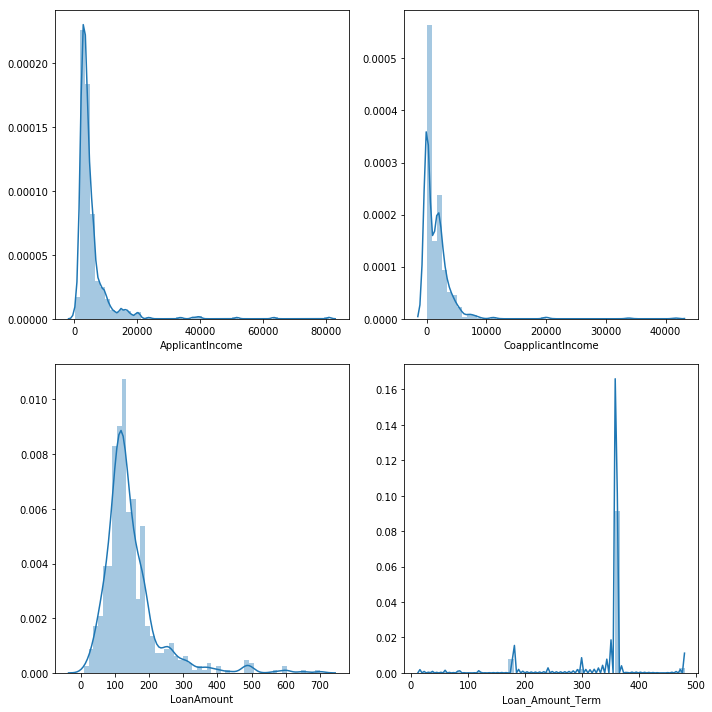

In [13]:
# Statistical dispersion of the continuous variables

notnull_loan_filter = train['LoanAmount'].notnull()
notnull_loan_term_filter = train['Loan_Amount_Term'].notnull()

fig, ax = plt.subplots(2, 2, figsize=(10,10))
sns.distplot(train['ApplicantIncome'], bins=50, ax=ax[0,0])
sns.distplot(train['CoapplicantIncome'], bins= 50, ax=ax[0,1])
sns.distplot(train[notnull_loan_filter]['LoanAmount'], bins=50, ax=ax[1,0])
sns.distplot(train[notnull_loan_term_filter]['Loan_Amount_Term'], bins=50, ax=ax[1,1])

plt.tight_layout()
plt.show()

**Comment:**
- ApplicantIncome and CoapplicantIncome: Both variables have right-asymetric distribution with many outliers
- LoanAmount: The variable has a right-asymetric distribution with few outliers. 
- Loan_Amount_Term: The variable has a left-asysmetrict with a mall number of outliers. 

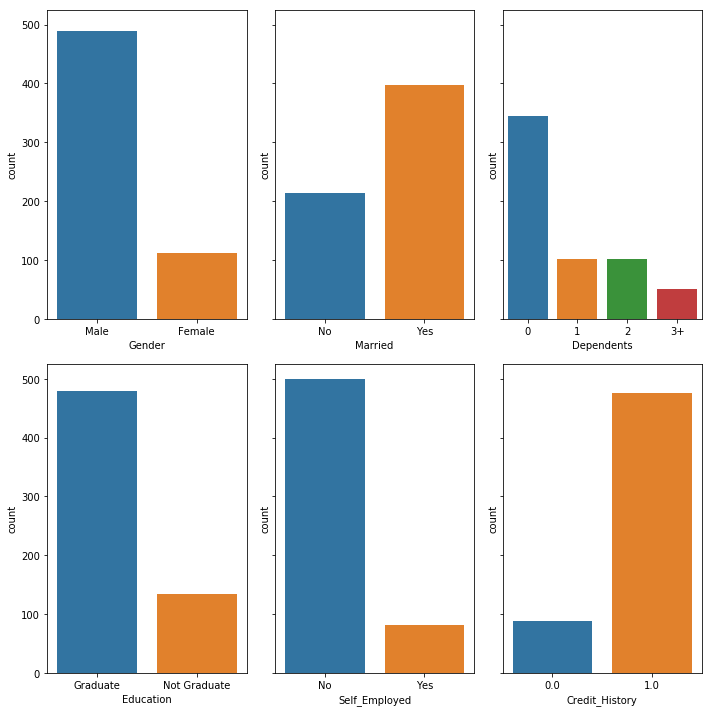

In [14]:
# Frequency of each category in the categorical variables 

train_object_columns = train.drop(['Loan_Status'], axis=1).select_dtypes(include=['object']).columns.tolist()
n = 0
fig, ax = plt.subplots(2, 3, figsize=(10,10),sharey=True)
for i in range(2):
    for j in range(3):
        sns.countplot(data=train, x=train_object_columns[n], label=train_object_columns[n], ax=ax[i,j])
        n += 1
plt.tight_layout()
plt.show()

### Bivariate analysis

**Let's check the correlation between the continuous variables!**

[Text(0.5, 0, 'CoapplicantIncome'),
 Text(1.5, 0, 'LoanAmount'),
 Text(2.5, 0, 'Loan_Amount_Term')]

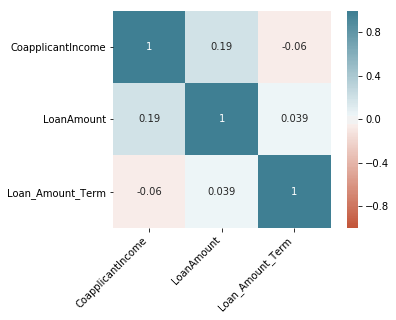

In [15]:
corr = train_float_data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

**Comment**: 
There is no pair of continuous variables with significant correlation. 

**Loan_Status/ Credit_History by other categorical variables**

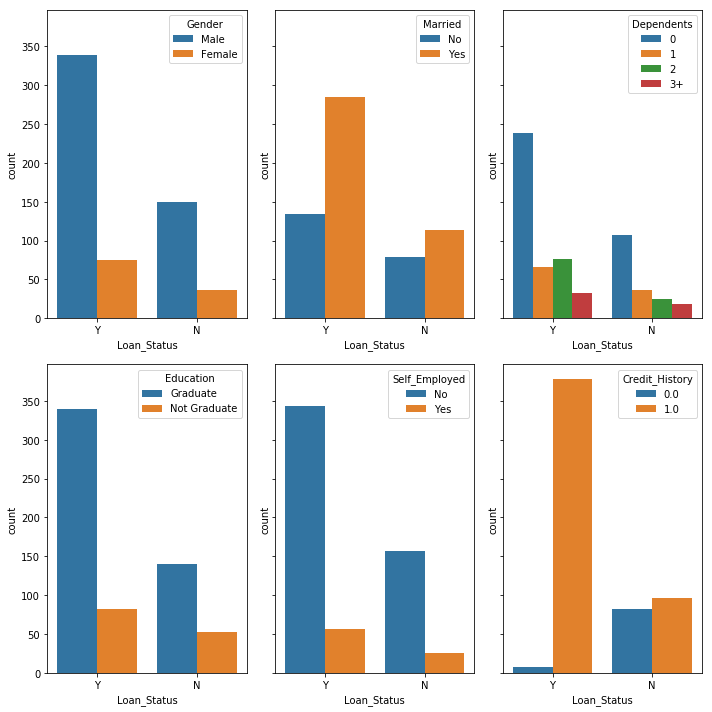

In [16]:
# Countlot: Loan_Status by other categorical variables
m = 0
fig, ax = plt.subplots(2, 3, figsize=(10,10),sharey=True)
for i in range(2):
    for j in range(3):
        sns.countplot(data=train, x="Loan_Status", hue=train_object_columns[m], ax=ax[i,j])
        m += 1
plt.tight_layout()
plt.show()

In [17]:
# Loan Status vs Gender
train['Gender'].value_counts()
# % impact of gender to Loan Status
gender_M = train[train['Gender'] == "Male"]['Loan_Status'].value_counts()
gender_F = train[train['Gender'] == "Female"]['Loan_Status'].value_counts()
number_of_gender_male = gender_M/train['Loan_Status'].shape[0]*100
number_of_gender_female = gender_F/train['Loan_Status'].shape[0]*100
print('Loan Status vs Gender')
print(number_of_gender_male)
print(number_of_gender_female)
print('=====================================')

# Loan Status vs Married
train['Married'].value_counts()
# % impact of Married to Loan Status
married_Y = train[train['Married'] == "Yes"]['Loan_Status'].value_counts()
married_N = train[train['Married'] == "No"]['Loan_Status'].value_counts()
number_of_married_Y = married_Y/train['Loan_Status'].shape[0]*100
number_of_married_N = married_N/train['Loan_Status'].shape[0]*100
print('Loan Status vs Married')
print(number_of_married_Y)
print(number_of_married_N)
print('=====================================')

# Loan Status vs Education
Education_Y = train[train['Education'] == "Graduate"]['Loan_Status'].value_counts()
Education_N = train[train['Education'] == "Not Graduate"]['Loan_Status'].value_counts()
number_of_Education_Y = Education_Y/train['Loan_Status'].shape[0]*100
number_of_Education_N = Education_N/train['Loan_Status'].shape[0]*100
print('Loan Status vs Education')
print(number_of_Education_Y)
print(number_of_Education_N)
print('=====================================')

# Loan Status vs Self_Employed
Self_Employed_Y = train[train['Self_Employed'] == "Yes"]['Loan_Status'].value_counts()
Self_Employed_N = train[train['Self_Employed'] == "No"]['Loan_Status'].value_counts()
number_of_Self_Employed_Y = Self_Employed_Y/train['Loan_Status'].shape[0]*100
number_of_Self_Employed_N = Self_Employed_N/train['Loan_Status'].shape[0]*100
print('Loan Status vs Self_Employed')
print(number_of_Self_Employed_Y)
print(number_of_Self_Employed_N)
print('=====================================')


# Loan Status vs Dependents
Dependents_Y = train[train['Dependents'] != "0"]['Loan_Status'].value_counts()
Dependents_N = train[train['Dependents'] == "0"]['Loan_Status'].value_counts()
number_of_Dependents_Y = Dependents_Y/train['Loan_Status'].shape[0]*100
number_of_Dependents_N = Dependents_N/train['Loan_Status'].shape[0]*100
print('Loan Status vs Dependents')
print(number_of_Dependents_Y)
print(number_of_Dependents_N)
print('=====================================')

# Loan Status vs Property_Area

Urban_Y = train[train['Property_Area'] == "Urban"]['Loan_Status'].value_counts()
Urban_N = train[train['Property_Area'] != "Urban"]['Loan_Status'].value_counts()
number_of_Urban_Y = Urban_Y/train['Loan_Status'].shape[0]*100
number_of_Urban_N = Urban_N/train['Loan_Status'].shape[0]*100
print('Loan Status vs Property_Area')
print(number_of_Urban_Y)
print(number_of_Urban_N)
print('=====================================')
# Loan Status vs Credit_History

Credit_Y = train[train['Credit_History'] == 1.0]['Loan_Status'].value_counts()
Credit_N = train[train['Credit_History'] != 1.0]['Loan_Status'].value_counts()
number_of_Credit_Y = Credit_Y/train['Loan_Status'].shape[0]*100
number_of_Credit_N = Credit_N/train['Loan_Status'].shape[0]*100
print('Loan Status vs Credit_History')
print(number_of_Credit_Y)
print(number_of_Credit_N)


Loan Status vs Gender
Y    55.211726
N    24.429967
Name: Loan_Status, dtype: float64
Y    12.214984
N     6.026059
Name: Loan_Status, dtype: float64
Loan Status vs Married
Y    46.416938
N    18.403909
Name: Loan_Status, dtype: float64
Y    21.824104
N    12.866450
Name: Loan_Status, dtype: float64
Loan Status vs Education
Y    55.374593
N    22.801303
Name: Loan_Status, dtype: float64
Y    13.355049
N     8.469055
Name: Loan_Status, dtype: float64
Loan Status vs Self_Employed
Y    9.120521
N    4.234528
Name: Loan_Status, dtype: float64
Y    55.863192
N    25.570033
Name: Loan_Status, dtype: float64
Loan Status vs Dependents
Y    29.967427
N    13.843648
Name: Loan_Status, dtype: float64
Y    38.762215
N    17.426710
Name: Loan_Status, dtype: float64
Loan Status vs Property_Area
Y    21.661238
N    11.237785
Name: Loan_Status, dtype: float64
Y    47.068404
N    20.032573
Name: Loan_Status, dtype: float64
Loan Status vs Credit_History
Y    61.563518
N    15.798046
Name: Loan_Status, d

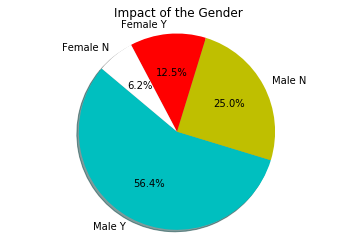

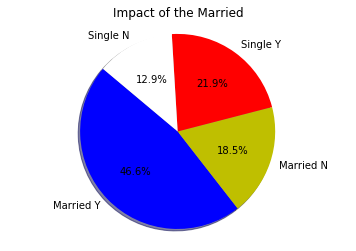

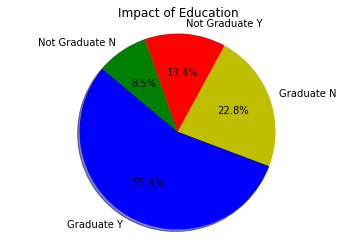

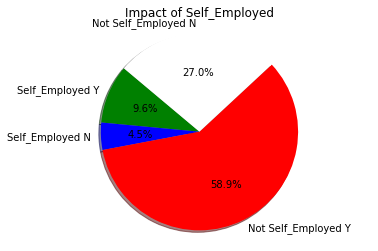

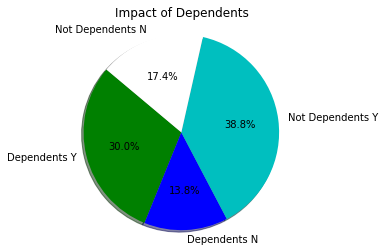

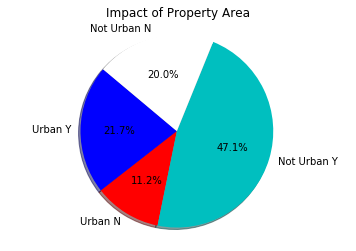

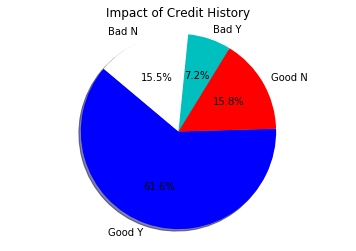

In [18]:
# Pie chart Loan Status vs Gender
labels = ['Male Y', 'Male N', 'Female Y', 'Female N']
sizes = [55.211726,24.429967,12.214984, 6.026059]
cols = ['c','y','r','w']
explode = (0.1, 0, 0, 0)
plt.pie(sizes,labels=labels,colors=cols,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Impact of the Gender')
plt.show()

# Pie chart Loan Status vs Married
labels = ['Married Y', 'Married N', 'Single Y', 'Single N']
sizes = [46.416938,18.403909,21.824104, 12.866450]
cols = ['b','y','r','w']
explode = (0.1, 0, 0, 0)
plt.pie(sizes,labels=labels,colors=cols,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Impact of the Married')
plt.show()

# Pie chart Loan Status vs Graduate
labels = ['Graduate Y', 'Graduate N', 'Not Graduate Y', 'Not Graduate N']
sizes = [55.374593,22.801303,13.355049, 8.469055]
cols = ['b','y','r','g']
explode = (0.1, 0, 0, 0)
plt.pie(sizes,labels=labels,colors=cols,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Impact of Education')
plt.show()

# Pie chart Loan Status vs Self_Employed
labels = ['Self_Employed Y', 'Self_Employed N', 'Not Self_Employed Y', 'Not Self_Employed N']
sizes = [9.120521,4.234528,55.863192, 25.570033]
cols = ['g','b','r','w']
explode = (0.1, 0, 0, 0)
plt.pie(sizes,labels=labels,colors=cols,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Impact of Self_Employed')
plt.show()

# Pie chart Loan Status vs Dependents

labels = ['Dependents Y', 'Dependents N', 'Not Dependents Y', 'Not Dependents N']
sizes = [29.967427,13.843648,38.762215,17.426710]
cols = ['g','b','c','w']
explode = (0.1, 0, 0, 0)
plt.pie(sizes,labels=labels,colors=cols,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Impact of Dependents')
plt.show()

# Pie chart Loan Status vs Property Area
labels = ['Urban Y', 'Urban N', 'Not Urban Y', 'Not Urban N']
sizes = [21.661238,11.237785,47.068404,20.032573]
cols = ['b','r','c','w']
explode = (0.1, 0, 0, 0)
plt.pie(sizes,labels=labels,colors=cols,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Impact of Property Area')
plt.show()

# Pie chart Loan Status vs Credit_History

labels = ['Good Y', 'Good N', 'Bad Y', 'Bad N']
sizes = [61.563518,15.798046,7.166124,15.472313]
cols = ['b','r','c','w']
explode = (0.1, 0, 0, 0)
plt.pie(sizes,labels=labels,colors=cols,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Impact of Credit History')
plt.show()


IndexError: list index out of range

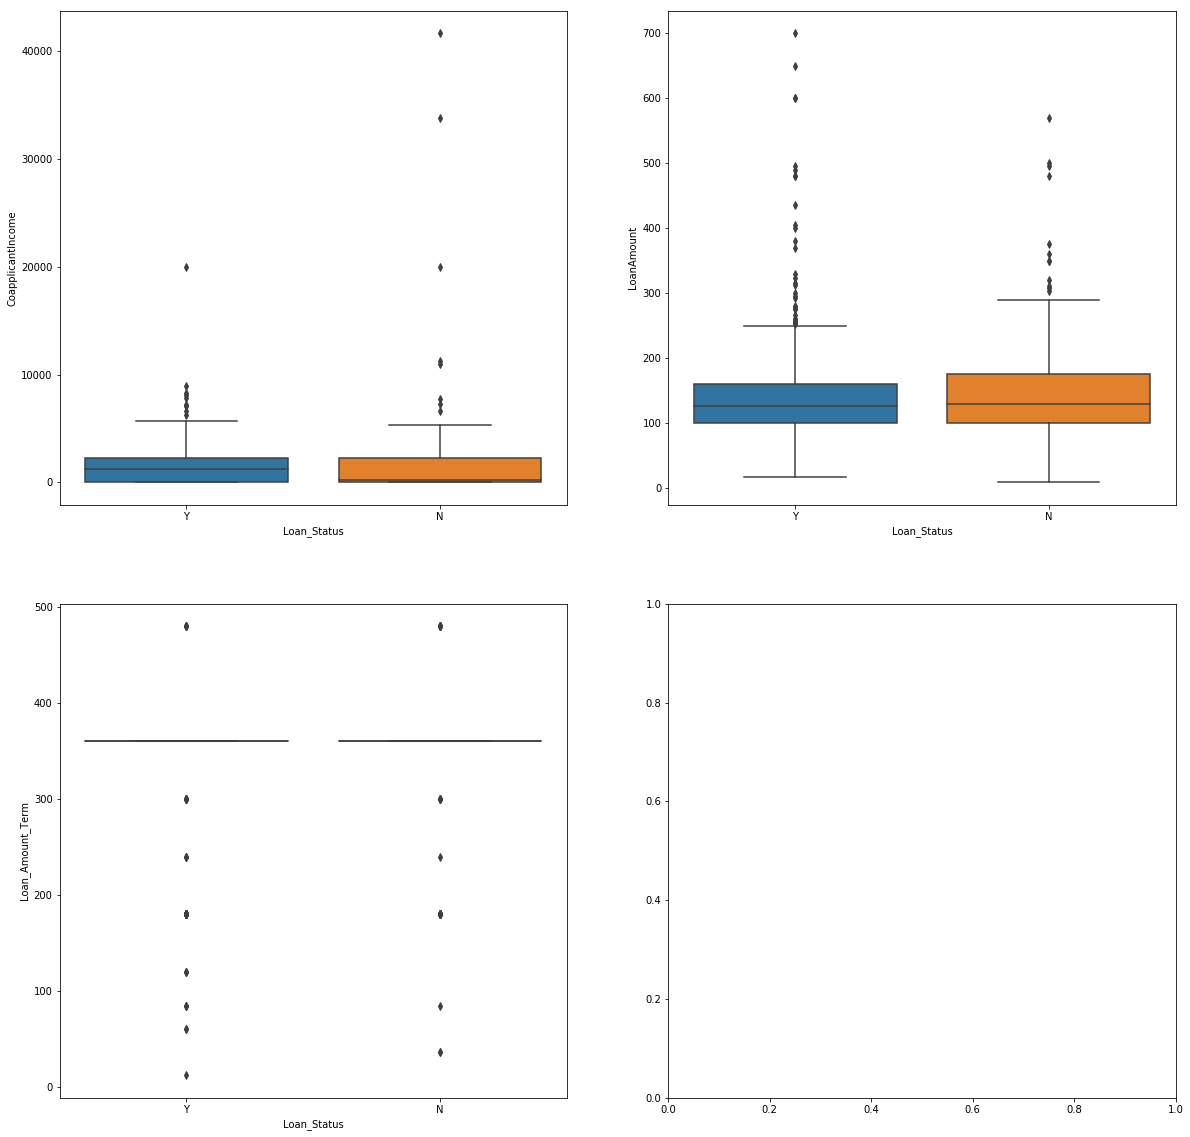

In [19]:
# Statiscal distribution of the continuous variables according to the groups of loan approval 

train_float_columns = train_float_data.columns.tolist()
m = 0 

fig, ax = plt.subplots(2, 2, figsize=(20,20))

for i in range(2):
    for j in range(2):
        sns.boxplot(x="Loan_Status", y=train_float_columns[m], data=train, ax=ax[i,j])
        m += 1

plt.tight_layout()
plt.show()

**Comments:**
- A larger proportion of not married applicants are refused than married ones. 
- A smaller proportion of applicants with 2 dependents is refused than other numbers.
- A larger proportion of non graduates are refused than graduates.
- Applicants without self-employment seem to be slightly preferred.
- **Credit history seems to be a significant factor as almost of the applicants with credit history equal to 0 (bad history) are refused.**
- It is easiest to get a loan if the property is semi urban and hardest if it is rural.
- It seems there is not much difference between two groups of loan approval by the income of the applicants and coapplicants
- It is difficult to see any patterns in loan approval by loan term. Most of the loans are for 360 months. 
- The third quarter of the refused loan are higher in terms of loan amount. 

## 3. Data preprocessing

### 3.1. Null or missing value treatments

In [20]:
num_nulls_train = sum(train.isnull().sum())
perent_train = num_nulls_train / train.shape[0] * 100

print('Training set')
print('Missing entries: {} ({} percent)'.format(num_nulls_train, perent_train))
print(train.isnull().sum()[train.isnull().sum() != 0])

Training set
Missing entries: 149 (24.267100977198698 percent)
Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64


In [21]:
num_nulls_test = sum(test.isnull().sum())
perent_test = num_nulls_test / test.shape[0] * 100

print('Testing set')
print('Missing entries: {} ({} percent)'.format(num_nulls_test, perent_test))
print(test.isnull().sum()[test.isnull().sum() != 0])

Testing set
Missing entries: 84 (22.888283378746593 percent)
Gender              11
Dependents          10
Self_Employed       23
LoanAmount           5
Loan_Amount_Term     6
Credit_History      29
dtype: int64


### Gender, Married, Dependents, Self_Employed and Loan_Amount_Term

In [22]:
train['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [23]:
# Fill the missing entries with maximum occuring events
train['Gender'].fillna('Male', inplace=True)
train['Married'].fillna('Yes', inplace=True)
train['Dependents'].fillna('0', inplace=True)
train['Self_Employed'].fillna('No', inplace=True)
train['Loan_Amount_Term'].fillna(360, inplace=True)
train['Credit_History'].fillna(1.0, inplace=True)

In [24]:
test['Gender'].describe()

count      356
unique       2
top       Male
freq       286
Name: Gender, dtype: object

In [25]:
test['Dependents'].describe()

count     357
unique      4
top         0
freq      200
Name: Dependents, dtype: object

In [26]:
test['Self_Employed'].describe()

count     344
unique      2
top        No
freq      307
Name: Self_Employed, dtype: object

In [27]:
test['Loan_Amount_Term'].describe()

count    361.000000
mean     342.537396
std       65.156643
min        6.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [28]:
test['Gender'].fillna('Male', inplace=True)
test['Dependents'].fillna('0', inplace=True)
test['Self_Employed'].fillna('No', inplace=True)
test['Loan_Amount_Term'].fillna(360, inplace=True)

In [29]:
test['Credit_History'].describe()

count     338.0
unique      2.0
top         1.0
freq      279.0
Name: Credit_History, dtype: float64

In [30]:
test['Credit_History'].fillna(1.0, inplace=True)

### LoanAmount

IndexError: list index out of range

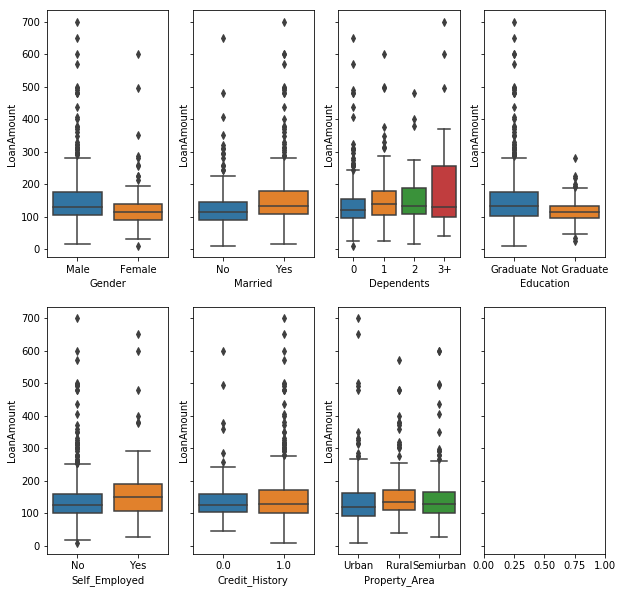

In [31]:
# Distribution of LoanAmount by categorical variables
k = 0
fig, ax = plt.subplots(2,4, figsize=(10,10),sharey=True)
for i in range(2):
    for j in range(4):
        sns.boxplot(x=train_object_columns[k], y="LoanAmount", data=train, ax=ax[i,j])
        k += 1
plt.tight_layout()
plt.show()

**Comment:**

- There seems not much difference between groups. 
- LoanAmount has many outliers. 

Only analyse the values that are less than 300.

In [32]:
train_loan_reduced = train[train['LoanAmount'] < 200]

IndexError: list index out of range

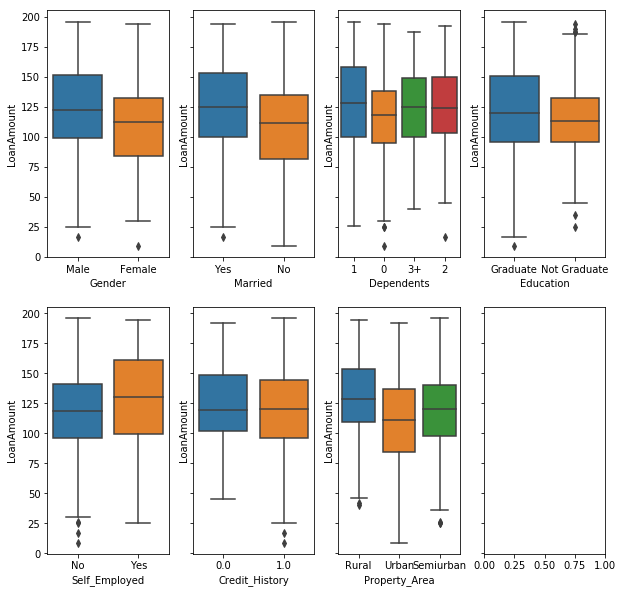

In [33]:
# Distribution of LoanAmount under 300 by categorical variables
h = 0
fig, ax = plt.subplots(2,4, figsize=(10,10),sharey=True)
for i in range(2):
    for j in range(4):
        sns.boxplot(x=train_object_columns[h], y="LoanAmount", data=train_loan_reduced, ax=ax[i,j])
        h += 1
plt.tight_layout()
plt.show()

**Comment:**
- Males often applied for higher loan than female. 
- **Married applicants with dependents also have higher range of loan amount.**
- **Graduates tend to apply for greater loan.**
- **Self-employed applicants need access to more loans.** 
- There is not much difference between the LoanAmount by Credit history and the area of property. 
    
**Hypotheses for predicting Loan Amount** 
- H1: Based on Maritial Status and Number of Dependents.
- H2: Based on Education and Self-employment. 

#### Testing H1: Married and Dependents

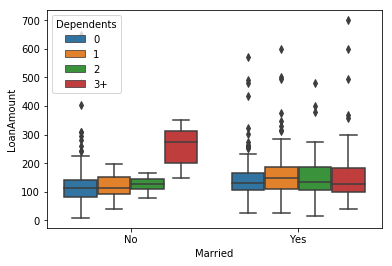

In [34]:
sns.boxplot(x="Married", y="LoanAmount", hue="Dependents", data=train)

In [35]:
train['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

**Comment**: 
There is a high probability of success that "Married" and "Dependents" are good predictors for LoanAmount. 

#### Testing H2: Education and Self_Employed

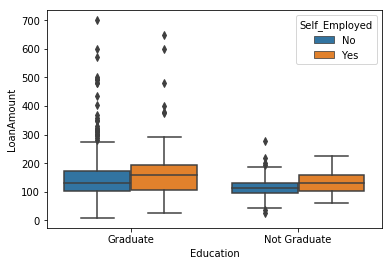

In [36]:
sns.boxplot(x="Education", y="LoanAmount", hue="Self_Employed", data=train)

In [37]:
train['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

**Comment:**
The chance of success for this pair of predictors are moderate. 

The hypothesis 1 with "Married" and "Dependents" give higher probability of successful prediction than the pair of "Education" and "Self-Employed".  

We will impute the missing values of "LoanAmount" with the median values for all the groups of unique values of "Married" and "Dependents" features. 

In [38]:
# Create a Pivot table that provides median values for all the groups of unique values of Married and Dependents features
table_train = train.pivot_table(values='LoanAmount', index='Married' ,columns='Dependents', aggfunc=np.median)

In [40]:
# Define a function that returns the values from pivot table:
def fill_missing_entries(index, data):
    x = data['Married'][index] 
    y = data['Dependents'][index]
    median_value = table_train.loc[x, y]
    data['LoanAmount'][index] = median_value

In [41]:
lst_null_loan = train[train['LoanAmount'].isnull()].index.tolist()
lst_null_loan_test = test[test['LoanAmount'].isnull()].index.tolist()

for idx in lst_null_loan:
    fill_missing_entries(idx, train)
    
for idx in lst_null_loan_test:
    fill_missing_entries(idx, test)

In [42]:
train['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [43]:
test['Credit_History'].value_counts()

1.0    308
0.0     59
Name: Credit_History, dtype: int64

In [44]:
# Fill missing entries with maximum occuring event 
train['Credit_History'].fillna(1.0, inplace=True)
test['Credit_History'].fillna(1.0, inplace=True)

In [45]:
sum(train.isnull().sum())

0

In [46]:
sum(test.isnull().sum())

0

### 3.2. Categorical variable encoding

In [47]:
# Use Label Encoder for ordinal categorical variables
replace_map_comp = {'Dependents': {'0': 0, '1': 1, '2': 2, '3+': 3}}
train_replace = train.copy()
train_replace.replace(replace_map_comp, inplace=True)
test_replace = test.copy()
test_replace.replace(replace_map_comp, inplace=True)

In [48]:
# Use One Hot Encoder to encode nominal categorical variables

lst_onehot = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Credit_History']

train_replace = pd.get_dummies(train_replace)
test_replace = pd.get_dummies(test_replace)

### 3.3. Outlier treatment 

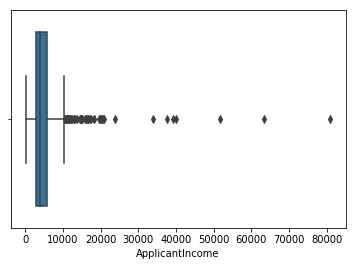

In [50]:
# ApplicantIncome
sns.boxplot(x=train['ApplicantIncome'])

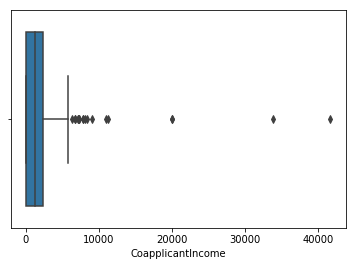

In [51]:
# CoapplicantIncome
sns.boxplot(x=train['CoapplicantIncome'])

In [52]:
#Wikipedia Definition
#The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread,
#is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, 
#or between upper and lower quartiles, IQR = Q3 − Q1.
#In other words, the IQR is the first quartile subtracted from the third quartile; 
#these quartiles can be clearly seen on a box plot on the data.
#It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             64.75
Loan_Amount_Term        0.00
Credit_History          0.00
dtype: float64


In [53]:
#The data point where we have False that means these values are valid whereas True indicates presence of an outlier.
print(train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))

TypeError: Could not operate array([nan, nan, nan, nan, nan, nan, nan]) with block values '<' not supported between instances of 'str' and 'float'

In [54]:
# remove Outlier
train_out = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train_out.shape

TypeError: Could not operate array([nan, nan, nan, nan, nan, nan, nan]) with block values '<' not supported between instances of 'str' and 'float'

In [55]:
# remove Outlier
train_out = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train_out.shape

TypeError: Could not operate array([nan, nan, nan, nan, nan, nan, nan]) with block values '<' not supported between instances of 'str' and 'float'

In [56]:
train_out

NameError: name 'train_out' is not defined

###### Comment:
We can see the Outlier not impact significantly but we need to disable their effect by log transformation

In [57]:
# Log transformation for "LoanAmount", 
train_replace['LoanAmount_log'] = np.log(train_replace['LoanAmount'])
test_replace['LoanAmount_log'] = np.log(test_replace['LoanAmount'])

In terms of "ApplicantIncome", one may have lower income but strong support from Co-applicants. Thus, it might be a good idea to combine both incomes as total income and take a log transformation as LoanAmount. 

In [58]:
# Calculate Total incomes from the applicant and coapplicant
train_replace['TotalIncome'] = train_replace['ApplicantIncome'] + train_replace['CoapplicantIncome']
test_replace['TotalIncome'] = test_replace['ApplicantIncome'] + test_replace['CoapplicantIncome']

# Perform log transformation on Total income feature
train_replace['TotalIncome_log'] = np.log(train_replace['TotalIncome'])
test_replace['TotalIncome_log'] = np.log(test_replace['TotalIncome'])

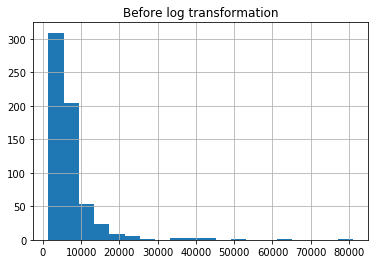

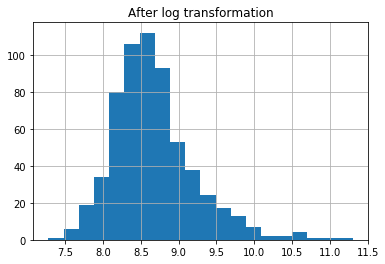

In [59]:
# plot Total incomes (train)
train_replace['TotalIncome'].hist(bins=20)
plt.title('Before log transformation')
plt.show()
# Current distribution of Total incomes after log transformation (train)
train_replace['TotalIncome_log'].hist(bins=20)
plt.title('After log transformation')
plt.show()

### Feature creation 

The ratio between debt and the total  income might give an idea of how well the applicant is suited to pay back his loan. Therefore, a new feature "Debt_Income_Ratio" is created. 

In [60]:
# Create the column Debt_Income_Ratio
train_replace['Debt_Income_Ratio'] = train_replace['TotalIncome_log'] / train_replace['LoanAmount_log']
test_replace['Debt_Income_Ratio'] = test_replace['TotalIncome_log'] / test_replace['LoanAmount_log']

The chances of getting a loan will be higher for: 

1. Applicants having a good credit history
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

In [61]:
# Drop the unneccessary columns from the dataset 
data = train_replace.drop(['ApplicantIncome', 'CoapplicantIncome', 
                       'Gender_Female','Married_No', 'Education_Not Graduate', 'Self_Employed_No', 'Loan_Status_N',
                        'LoanAmount', 'TotalIncome'], 
                       axis=1)

# Rename the columns for better presentation
data.rename(columns={'Gender_Male': 'Gender',
                    'Education_Graduate': 'Education',
                    'Married_Yes': 'Married',
                    'Self_Employed_Yes': 'Self_Employed',
                    'Loan_Status_Y': 'Loan_Status',
                    'LoanAmount_log': 'LoanAmount', 
                     'TotalIncome_log': 'TotalIncome'},
                  inplace=True)

In [62]:
test_replace = test_replace.drop(['ApplicantIncome', 'CoapplicantIncome', 
                       'Gender_Female','Married_No', 'Education_Not Graduate', 'Self_Employed_No', 
                        'LoanAmount', 'TotalIncome'], 
                       axis=1)

test_replace.rename(columns={'Gender_Male': 'Gender',
                    'Education_Graduate': 'Education',
                    'Married_Yes': 'Married',
                    'Self_Employed_Yes': 'Self_Employed',
                    'LoanAmount_log': 'LoanAmount', 
                     'TotalIncome_log': 'TotalIncome'},
                  inplace=True)

### Feature selection 

#### Approach 1: Selecting all features

In [63]:
# Define X1 and y1
X1 = data.drop(['Loan_Status'], axis=1)
y = data['Loan_Status']
X1_test = test_replace

#### Approach 2: Selecting most significant features

Overall, if we take all the variables into the model, it will usually result in overfitting and the model will not generalize well. It's better to select the important features. 

We will perform a feature selection based on the importance of the features and the base model for selection is **Random Forest Classification**. 

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X1, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

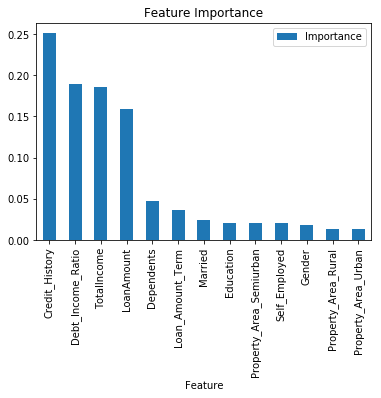

In [67]:
# Visualize the importance of features 
features = pd.DataFrame()
features['Feature'] = X1.columns
features['Importance'] = rfc.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)

# Plot the importance of features
features.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

**Top 5 important features**: 
1. Credit_History 
2. TotalIncome
3. Debt_Income_Ratio
4. LoanAmount
5. Dependents

In [68]:
# Create a new X with reduce number of features
new_features = ['Credit_History', 'TotalIncome', 'Debt_Income_Ratio', 'LoanAmount', 'Dependents']

X2 = pd.DataFrame()

for column in new_features:
    X2[column] = X1[column]

X2.head()

,Credit_History,TotalIncome,Debt_Income_Ratio,LoanAmount,Dependents
Loan_ID,,,,,
LP001002,1.0,8.674026,1.828061,4.744932,0
LP001003,1.0,8.714568,1.796066,4.852030,1
LP001005,1.0,8.006368,1.910985,4.189655,0
LP001006,1.0,8.505323,1.776572,4.787492,0
LP001008,1.0,8.699515,1.757918,4.948760,0


In [69]:
X2_test = pd.DataFrame()

for column in new_features:
    X2_test[column] = X1_test[column]

X2_test.head()

,Credit_History,TotalIncome,Debt_Income_Ratio,LoanAmount,Dependents
Loan_ID,,,,,
LP001015,1.0,8.651724,1.840604,4.700480,0
LP001022,1.0,8.428581,1.742781,4.836282,1
LP001031,1.0,8.824678,1.653324,5.337538,2
LP001035,1.0,8.494129,1.844477,4.605170,2
LP001051,1.0,8.094378,1.857911,4.356709,0


## 4. Building predictive model

### 4.1. Selecting the base model

In [70]:
# Import LogisticRegression, DecisionTreeClassifier, BernoulliNB, GaussianNB, SVM
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB


lr = LogisticRegression()
dtc = DecisionTreeClassifier()
bnb = BernoulliNB()
gnb = GaussianNB()
svm = LinearSVC()

models = [lr, dtc, rfc, gnb, bnb, svm]
models_name = ["Logistic Regression", "Decision Tree", "Random Forest", "Bernoulli NB", "Gaussian NB", "SVM"]

In [71]:
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score

#Generic function for making a classification model and assessing performance:
def classification_model(model, X, y):
    #Fit the model:
    model.fit(X, y)
  
    #Make predictions on training set:
    predictions = model.predict(X)
  
    #Perform k-fold cross-validation with 5 folds
    error = cross_val_score(model, X, y, cv=5)
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
    #Print accuracy
    accuracy = accuracy_score(predictions, y)
    print("Training Accuracy : %s" % "{0:.3%}".format(accuracy))
    
    print('----------------------------------------------------------')

#### Approach 1

In [72]:
for idx, model in enumerate(models):
    print(models_name[idx])
    classification_model(model, X1, y)

Logistic Regression
Cross-Validation Score : 80.957%
Training Accuracy : 80.945%
----------------------------------------------------------
Decision Tree
Cross-Validation Score : 71.034%
Training Accuracy : 100.000%
----------------------------------------------------------
Random Forest
Cross-Validation Score : 78.850%
Training Accuracy : 100.000%
----------------------------------------------------------
Bernoulli NB
Cross-Validation Score : 80.151%
Training Accuracy : 80.782%
----------------------------------------------------------
Gaussian NB
Cross-Validation Score : 80.957%
Training Accuracy : 80.945%
----------------------------------------------------------
SVM
Cross-Validation Score : 63.091%
Training Accuracy : 75.081%
----------------------------------------------------------


**Selection of the base model**: 

- Decision Trees and Random Forest: Overfitting because the training accuracy reached 100%, which is impossible. 
- SVM and Bernoulli NB: Cross-validation score and trainning accuracy make sense, but the model has poorer performance than Logistic Regression and Gaussian NB.
- Logistic Regression and Gaussian NB: Cross-validation score and trainning accuracy make sense and these model achieves the best comparable perforance. 

**Selected base models:** 
- Logistic Regression
- Gaussian NB 

#### Approach 2

In [73]:
for idx, model in enumerate(models):
    print(models_name[idx])
    classification_model(model, X2, y)

Logistic Regression
Cross-Validation Score : 80.957%
Training Accuracy : 80.945%
----------------------------------------------------------
Decision Tree
Cross-Validation Score : 71.169%
Training Accuracy : 100.000%
----------------------------------------------------------
Random Forest
Cross-Validation Score : 76.555%
Training Accuracy : 99.837%
----------------------------------------------------------
Bernoulli NB
Cross-Validation Score : 80.315%
Training Accuracy : 80.619%
----------------------------------------------------------
Gaussian NB
Cross-Validation Score : 80.957%
Training Accuracy : 80.945%
----------------------------------------------------------
SVM
Cross-Validation Score : 80.957%
Training Accuracy : 80.945%
----------------------------------------------------------


**Selected base models**: 

- Logistic Regression
- Gaussian NB 
- SVM 

### Testing accuracy

#### Approach 1

In [74]:
# Fit X1 and y to the models 
lr.fit(X1, y)
gnb.fit(X1, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [75]:
# Make predictions with X1_test
predictions_app1_lr = pd.DataFrame()
predictions_app1_lr['Loan_ID'] = X1_test.index.tolist()
predictions_app1_lr['Loan_Status'] = lr.predict(X1_test)

predictions_app1_gnb = pd.DataFrame()
predictions_app1_gnb['Loan_ID'] = X1_test.index.tolist()
predictions_app1_gnb['Loan_Status'] = gnb.predict(X1_test)

In [76]:
replace_map_target = {'Loan_Status': {1: 'Y', 0: 'N'}}
predictions_app1_lr.replace(replace_map_target, inplace=True)
predictions_app1_lr.to_csv('predictions_app1_lr.csv',index=False)
print('Testing Accuracy of Logistic Regression - base model: 77.8%')

predictions_app1_gnb.replace(replace_map_target, inplace=True)
predictions_app1_gnb.to_csv('predictions_app1_gnb.csv',index=False)
print('Testing Accuracy of Gaussian NB - base model: 77%')

Testing Accuracy of Logistic Regression - base model: 77.8%
Testing Accuracy of Gaussian NB - base model: 77%


#### Approach 2

In [77]:
# Fit X2 and y to the models 
lr.fit(X2, y)
gnb.fit(X2, y)
svm.fit(X2, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [78]:
# Make predictions with X2_test
predictions_app2_lr = pd.DataFrame()
predictions_app2_lr['Loan_ID'] = X2_test.index.tolist()
predictions_app2_lr['Loan_Status'] = lr.predict(X2_test)

predictions_app2_gnb = pd.DataFrame()
predictions_app2_gnb['Loan_ID'] = X2_test.index.tolist()
predictions_app2_gnb['Loan_Status'] = gnb.predict(X2_test)

predictions_app2_svm = pd.DataFrame()
predictions_app2_svm['Loan_ID'] = X2_test.index.tolist()
predictions_app2_svm['Loan_Status'] = svm.predict(X2_test)

In [79]:
predictions_app2_lr.replace(replace_map_target, inplace=True)
predictions_app2_lr.to_csv('predictions_app2_lr.csv',index=False)
print('Testing Accuracy of Logistic Regression - base model: 77.8%')

predictions_app2_gnb.replace(replace_map_target, inplace=True)
predictions_app2_gnb.to_csv('predictions_app2_gnb.csv',index=False)
print('Testing Accuracy of Gaussian NB - base model: 76.3%')

predictions_app2_svm.replace(replace_map_target, inplace=True)
predictions_app2_svm.to_csv('predictions_app2_svm.csv',index=False)
print('Testing Accuracy of SVM - base model: 77.8%')

Testing Accuracy of Logistic Regression - base model: 77.8%
Testing Accuracy of Gaussian NB - base model: 76.3%
Testing Accuracy of SVM - base model: 77.8%


**Best models**:
    - Approach 1: Logistic Regression 
    - Approach 2: Logistic Regression and SVM

## 5. Tuning model parameteres

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
# Use GridSearchCV to find the best combination of parameters for the model Logistic Regression and SVM 
param_grid_lr = {'penalty': ['l1', 'l2'],
                 'C': [0.0001, 0.001, 0.01, 1, 10, 100, 1000]}

CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5)

#### Approach 1

In [82]:
CV_lr.fit(X1, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [83]:
best_lr = CV_lr.best_estimator_

In [85]:
predictions_app1_lr_best = pd.DataFrame()
predictions_app1_lr_best['Loan_ID'] = X1_test.index.tolist()
predictions_app1_lr_best['Loan_Status'] = best_lr.predict(X1_test)
predictions_app1_lr_best.replace(replace_map_target, inplace=True)
predictions_app1_lr_best.to_csv('predictions_app1_lr_best.csv',index=False)
print('Testing Accuracy of Logistic Regression after GridSearchCV: 77.8%')

Testing Accuracy of Logistic Regression after GridSearchCV: 77.8%


#### Approach 2

In [86]:
CV_lr.fit(X2, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [87]:
best_lr2 = CV_lr.best_estimator_

In [89]:
predictions_app2_lr_best = pd.DataFrame()
predictions_app2_lr_best['Loan_ID'] = X2_test.index.tolist()
predictions_app2_lr_best['Loan_Status'] = best_lr2.predict(X2_test)
predictions_app2_lr_best.replace(replace_map_target, inplace=True)
predictions_app2_lr_best.to_csv('predictions_app2_lr_best.csv',index=False)
print('Testing Accuracy of Logistic Regression after GridSearchCV: 77.8%')

Testing Accuracy of Logistic Regression after GridSearchCV: 77.8%


In [90]:
# GridsearchCV with SVM
param_grid_svm = {'C': [0.0001, 0.001, 0.01, 1, 10, 100, 1000],
                 'class_weight': ['balanced', None]}

CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5)

CV_svm.fit(X2, y)

best_svm = CV_svm.best_estimator_

C:\Users\7440i7\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [91]:
predictions_app2_svm_best = pd.DataFrame()
predictions_app2_svm_best['Loan_ID'] = X2_test.index.tolist()
predictions_app2_svm_best['Loan_Status'] = best_svm.predict(X2_test)
predictions_app2_svm_best.replace(replace_map_target, inplace=True)
predictions_app2_svm_best.to_csv('predictions_app2_svm_best.csv',index=False)
print('Testing Accuracy of SVM after GridSearchCV: 77.8%')

Testing Accuracy of SVM after GridSearchCV: 77.8%


## 7. Conclusion

### 7.1. Summary of findings

1. Best models: 
    - Logistic Regression
    - SVM 
    Testing accuracy: 77.8% (under both approaches and no change after GridSearchCV) 
    

2. Recommended model: Logistic Regression 

3. Most important feature: Credit history 

4. Only top 5 features are enough to predict loan approval. 

### 7.2. Recommendations

#### Feature engineering: 
1. Treatment of missing values: 
    - Missing values can be treated as a seperate category (no imputation).  
    - Other imputations: 
        + LoanAmount: Us predictive models such Linear Regression or Logistic Regression. 
        + Credit_History: Use KNN. 
    - Feature creation: Additional features can be created to provide more meaningful explanation to the model. For example, monthly earnings of the household after extracting the burden of dependents may give a good estimates of the ability to pay back the debt. 

#### Improving the base algorithm: 
1. Tuning parameters: Other tuning methods may be considered. 
2. Using esemblen techniques such as XG Boost to improve the algorithm. 